In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [178]:
df1 = pd.read_csv("../ml/datasets/해커톤/raw_data2.csv", encoding='cp949')
# df1.info()
df1 = df1.replace(',', '')
df1['달러원종가'] = pd.to_numeric(df1['달러원종가'], errors='ignore')
df1['달러원시가'] = pd.to_numeric(df1['달러원시가'], errors='ignore')
df1['달러인덱스'] = pd.to_numeric(df1['달러인덱스'], errors='ignore')

In [179]:
df = pd.read_csv("../ml/datasets/해커톤/10년 BIR 지수 Yr.2010.csv", encoding='cp949')

df.columns=['날짜', 'BIR']
df['BIR'] = pd.to_numeric(df['BIR'], errors='ignore')

In [180]:
df2 =pd.merge(df1,df,how='inner',on='날짜')
df2.to_csv('raw_data_joo.csv',encoding='euc-kr',index=False)
# df2['달러원종가'] = df2['달러원종가'].replace(',', '')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3318 non-null   object 
 1   달러원종가   3318 non-null   float64
 2   달러원시가   3318 non-null   float64
 3   CD91    3318 non-null   float64
 4   WTI가    3318 non-null   float64
 5   달러위안화   3318 non-null   float64
 6   달러엔     3318 non-null   float64
 7   달러인덱스   3227 non-null   float64
 8   유로달러    3318 non-null   float64
 9   유로인덱스   3318 non-null   float64
 10  콜금리     3318 non-null   float64
 11  코스피종가   3317 non-null   float64
 12  BIR     3263 non-null   float64
dtypes: float64(12), object(1)
memory usage: 337.1+ KB


<Axes: >

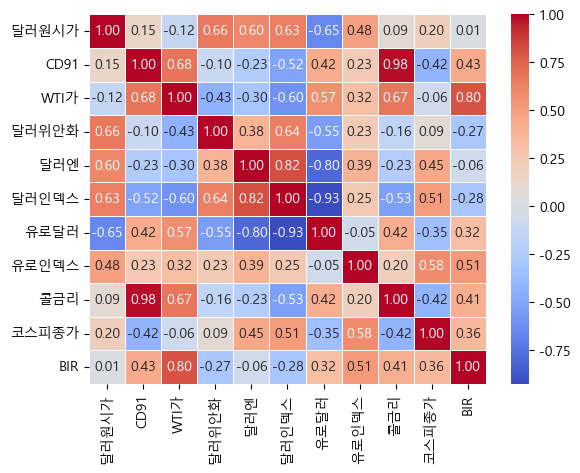

In [182]:
corr_data = df2[[ '달러원시가','CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [187]:
corr_data = df2[[ '달러원종가','CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']]

np.abs(corr_data.corr()['달러원종가']).sort_values(ascending=False)

달러원종가    1.000000
달러위안화    0.660872
유로달러     0.651987
달러인덱스    0.633283
달러엔      0.595101
유로인덱스    0.481935
코스피종가    0.196566
CD91     0.146141
WTI가     0.120356
콜금리      0.093694
BIR      0.008809
Name: 달러원종가, dtype: float64

In [205]:
from sklearn.model_selection import train_test_split
corr_data=corr_data.fillna(0)
y=corr_data['달러원종가']
X=corr_data.drop( ['달러원종가'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [208]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)

weight: [ 8.26261672e+01  2.10339215e-01  1.76013489e+01 -1.44560442e+00
  6.97476396e-02 -6.83812693e+02  5.08631558e+00 -6.99349333e+01
 -6.24260965e-02 -2.77391557e+00]
bias: 1582.1009384007689


In [209]:
coef=pd.Series(data=np.round(lr_model.coef_,1), index=X.columns)
coef

CD91      82.6
WTI가       0.2
달러위안화     17.6
달러엔       -1.4
달러인덱스      0.1
유로달러    -683.8
유로인덱스      5.1
콜금리      -69.9
코스피종가     -0.1
BIR       -2.8
dtype: float64

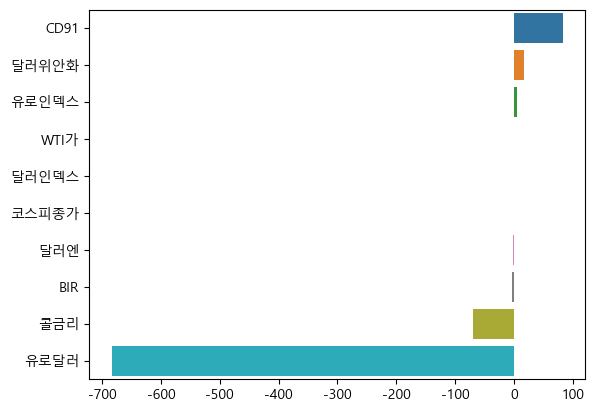

In [213]:
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

In [215]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_mode.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:817.043590, RMSE:28.584, r2:0.852


In [216]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
744,1239.28,1351.324825,112.044825
404,1253.50,1362.602224,109.102224
603,1439.96,1343.474684,96.485316
549,1237.26,1330.091989,92.831989
984,1394.68,1307.087450,87.592550
...,...,...,...
937,1076.87,1077.040494,0.170494
199,1173.87,1173.717661,0.152339
956,1128.00,1127.896529,0.103471
120,1239.72,1239.668236,0.051764


In [236]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=3)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))
# 3개 features 에 'CD91','콜금리' 추가함 
corr_features = corr_data[['달러위안화', '달러엔', '유로달러','콜금리']]

features=Index(['달러위안화', '달러엔', '유로달러'], dtype='object')


In [237]:
X_selected=corr_features
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1646.147009, RMSE:40.573, r2:0.701


In [238]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE:976.555848, RMSE:31.250, r2:0.823


In [239]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1646.147009, RMSE:40.573, r2:0.701


달러위안화    0.234943
달러엔      0.093620
유로달러     0.421272
콜금리      0.177295
dtype: float64


KeyError: '0,'

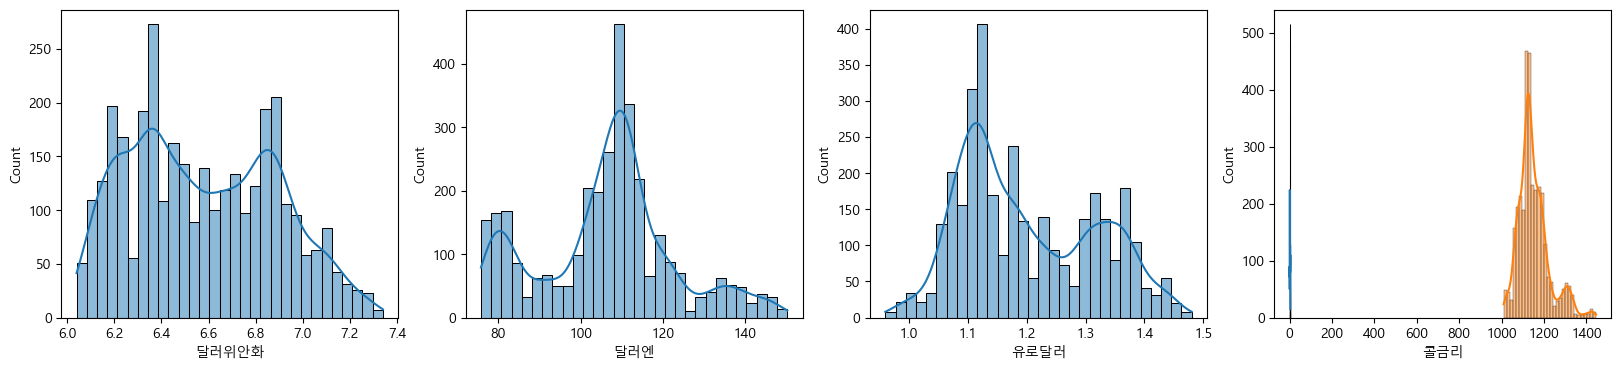

In [241]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0,.2f}'.format(y.skew()))

달러위안화    0.234943
달러엔      0.093620
유로달러     0.352059
콜금리      0.177295
dtype: float64

달러원종가:0.93


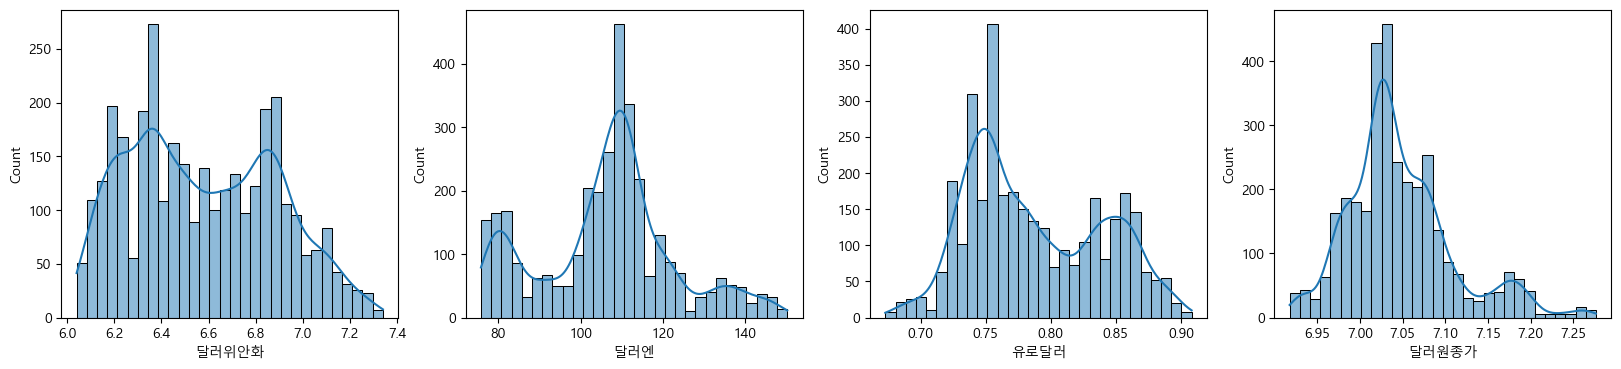

In [242]:
# 로그연산 유로달러 해보기 
X_selected['유로달러']=np.log1p(X_selected['유로달러'])
y=np.log1p(y)

# 데이터분포확인 - 히스토그램 
nrows=1
ncols=4

fig, axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.3, random_state=42)

lr_model4= LinearRegression()
lr_model4.fit(X_train, y_train)

y_pred= lr_model4.predict(X_test)
mse=mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse=np.sqrt(mse)
r2=r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2))

MSE : 1614.049, RMSE : 40.175, r2 : 0.707


In [248]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

Scores {'fit_time': array([0.0054152 , 0.00298691, 0.00299025]), 'score_time': array([0.00422096, 0.00099564, 0.0010047 ]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.01504937, -0.00102649, -0.01246945]), 'train_score': array([-0.00036306, -0.00043051, -0.00049963])}
MSE: [0.00036306 0.00043051 0.00049963]
RMSE: [0.01905409 0.02074885 0.02235238]
RMSE 평균:0.021


In [249]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [252]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/1.3 MB ? eta -:--:--
     ---------------                          0.5/1.3 MB 15.9 MB/s eta 0:00:01
     --------------------------------         1.1/1.3 MB 13.7 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 12.0 MB/s eta 0:00:00


In [254]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986


LGBMRegressor(random_state=42)

In [257]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

LinearRegression MSE:0.001, RMSE:0.035, r2:0.695
RandomForestRegressor MSE:0.000, RMSE:0.010, r2:0.975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986
LGBMRegressor MSE:0.000, RMSE:0.011, r2:0.970
